In [1]:
import requests

In [2]:
import math
import numpy as np
S0 = 36
T = 1
r = 0.06
sigma = 0.2
def simulate_tree(M) :
    dt = T/M
    u =  math.exp(sigma * math.sqrt(dt))
    d = 1/u
    S = np.zeros((M+1,M+1))
    S[0,0] = 50
    z = 1
    for t in range(1,M+1):
        for i in range(z) :
            S[i,t] = S[i,t-1] * u
            S[i+1,t] = S[i,t-1]*d
        z+=1
    return S
simulate_tree(4)

array([[50.        , 55.2585459 , 61.07013791, 67.49294038, 74.59123488],
       [ 0.        , 45.2418709 , 50.        , 55.2585459 , 61.07013791],
       [ 0.        ,  0.        , 40.93653765, 45.2418709 , 50.        ],
       [ 0.        ,  0.        ,  0.        , 37.04091103, 40.93653765],
       [ 0.        ,  0.        ,  0.        ,  0.        , 33.5160023 ]])

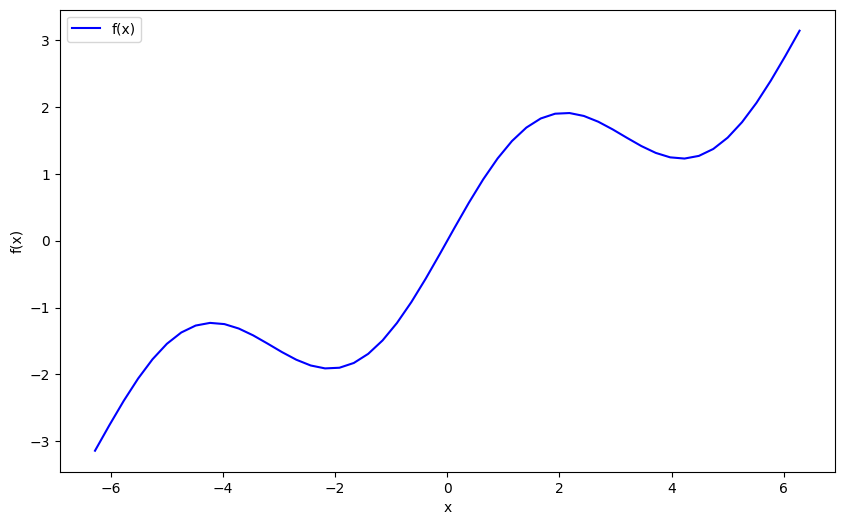

In [3]:
import matplotlib.pyplot as plt
def f(x) : 
    return np.sin(x) + 0.5*x
def create_plot(x,y,styles,labels,axlabels) :
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

x = np.linspace(-2*np.pi,2*np.pi,50) 
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])


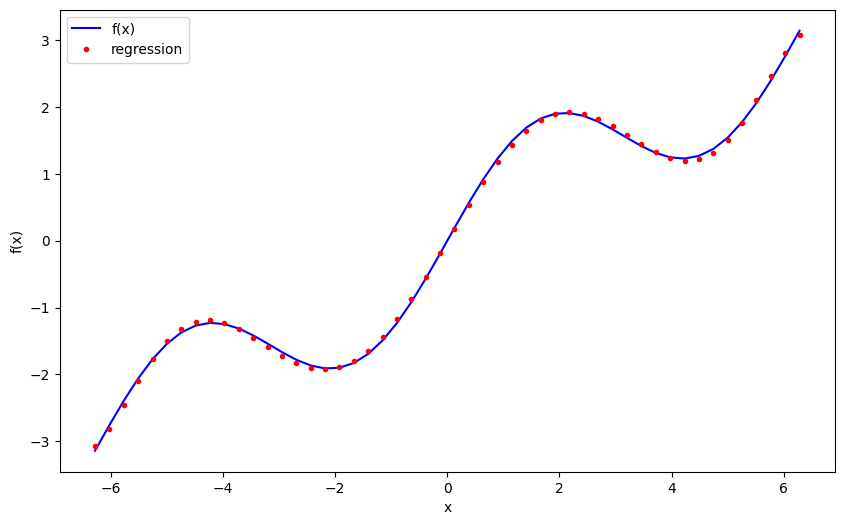

In [4]:
res = np.polyfit(x,f(x),deg = 8,full = True)
ry = np.polyval(res[0], x) 
create_plot([x, x], [f(x), ry], ['b', 'r.'],
 ['f(x)', 'regression'], ['x', 'f(x)'])


In [4]:
matrix = np.zeros((3 + 1, len(x))) 
matrix[3, :] = x ** 3 
matrix[2, :] = x ** 2 
matrix[1, :] = x 
matrix[0, :] = 1
matrix.T

array([[ 1.00000000e+00, -6.28318531e+00,  3.94784176e+01,
        -2.48050213e+02],
       [ 1.00000000e+00, -6.02672876e+00,  3.63214596e+01,
        -2.18899585e+02],
       [ 1.00000000e+00, -5.77027222e+00,  3.32960415e+01,
        -1.92127223e+02],
       [ 1.00000000e+00, -5.51381568e+00,  3.04021633e+01,
        -1.67631925e+02],
       [ 1.00000000e+00, -5.25735913e+00,  2.76398251e+01,
        -1.45312487e+02],
       [ 1.00000000e+00, -5.00090259e+00,  2.50090267e+01,
        -1.25067707e+02],
       [ 1.00000000e+00, -4.74444605e+00,  2.25097683e+01,
        -1.06796381e+02],
       [ 1.00000000e+00, -4.48798951e+00,  2.01420498e+01,
        -9.03973081e+01],
       [ 1.00000000e+00, -4.23153296e+00,  1.79058712e+01,
        -7.57692842e+01],
       [ 1.00000000e+00, -3.97507642e+00,  1.58012325e+01,
        -6.28111068e+01],
       [ 1.00000000e+00, -3.71861988e+00,  1.38281338e+01,
        -5.14215731e+01],
       [ 1.00000000e+00, -3.46216333e+00,  1.19865749e+01,
      

Text(0.5, 1.0, 'Poisson')

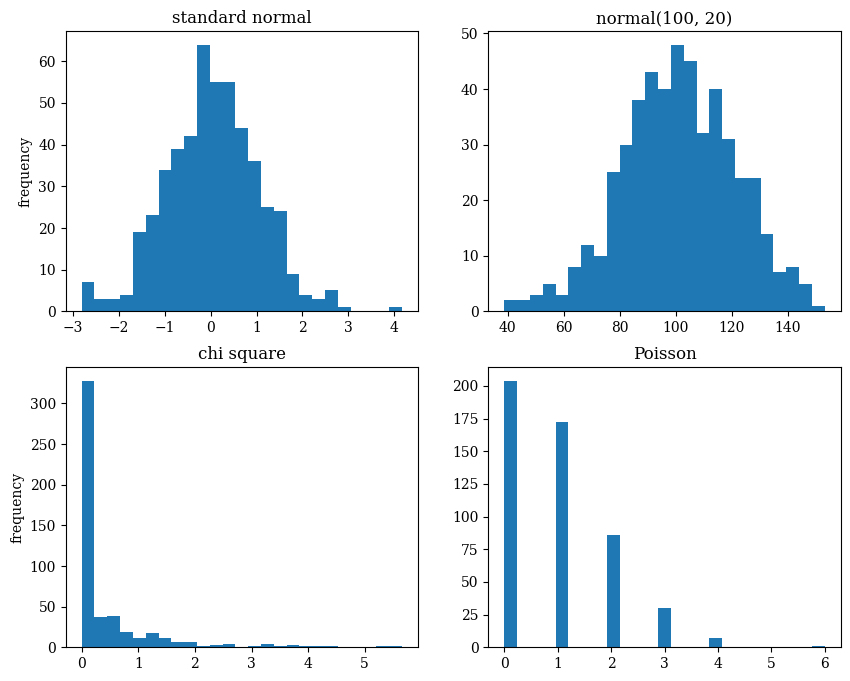

In [5]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt,mpl
# plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100,20,sample_size)
rn3 = npr.chisquare(df = 0.5,size = sample_size)
rn4 = npr.poisson(lam = 1.0,size = sample_size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')

[[36. 36. 36. ... 36. 36. 36.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[[36.         36.         36.         ... 36.         36.
  36.        ]
 [35.36197751 35.08312308 36.73944525 ... 34.77594273 35.82724194
  34.48913811]
 [33.59424236 34.74971848 36.56507905 ... 35.19756831 33.9985753
  35.50778989]
 ...
 [44.70067196 26.29965182 36.53335692 ... 49.70267658 34.17415198
  36.68584282]
 [43.61107215 25.70182799 36.15196689 ... 48.51788442 33.77633396
  36.94471408]
 [43.82810149 25.12428883 38.09254315 ... 49.18342967 33.89787077
  36.53831817]]


Text(0, 0.5, 'frequency')

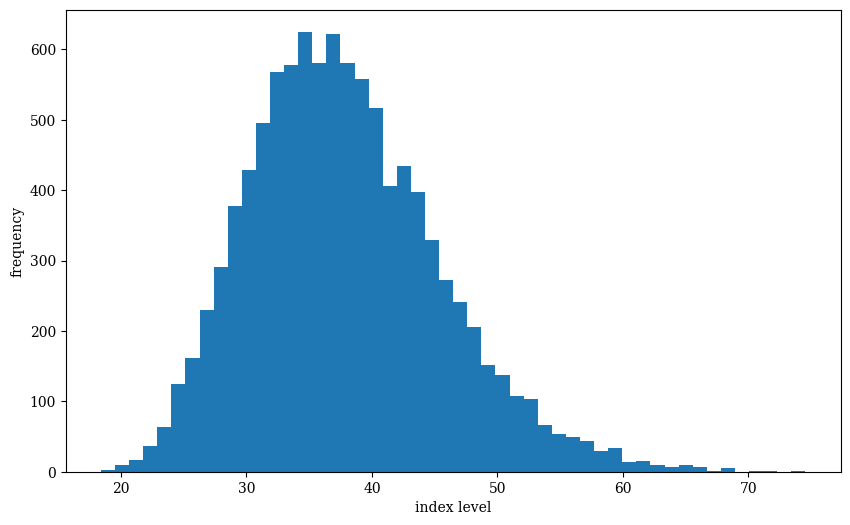

In [8]:
# Black_Scholes model to caculate the future price
I = 10000 
M = 50 
dt = T / M 
r = 0.05
T = 2.0
S = np.zeros((M + 1, I)) 
S[0] = S0 
print(S)
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
        sigma * math.sqrt(dt) * npr.standard_normal(I))
print(S)
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

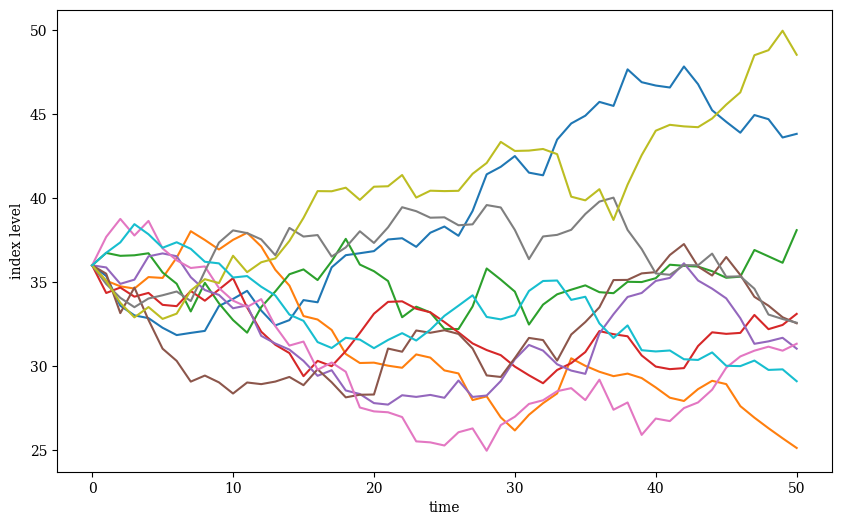

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

Text(0, 0.5, 'frequency')

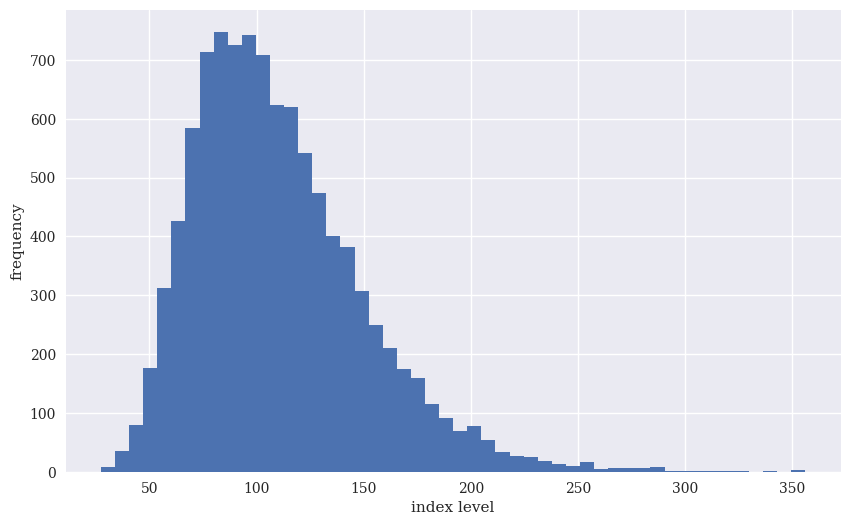

In [36]:
# One base sample of Black-Scholes
S0 = 100 
r = 0.05 
sigma = 0.25 
T = 2.0 
I = 10000 
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
sigma * math.sqrt(T) * npr.standard_normal(I)) 
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

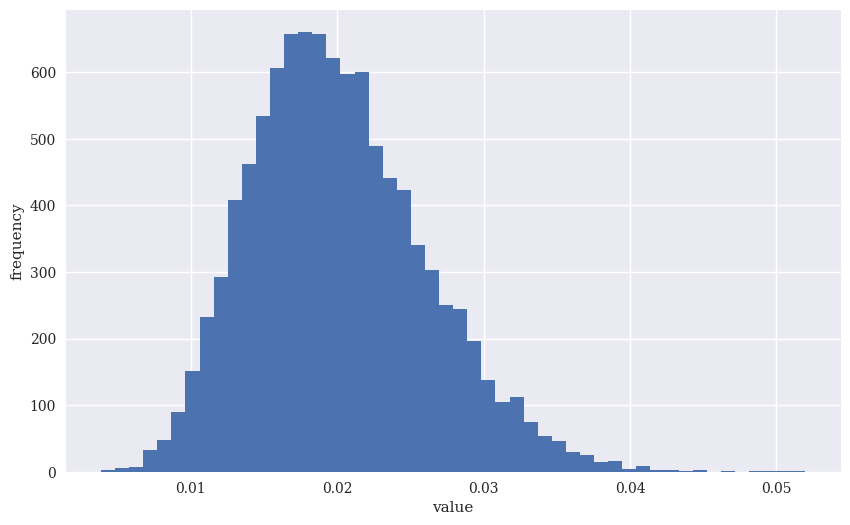

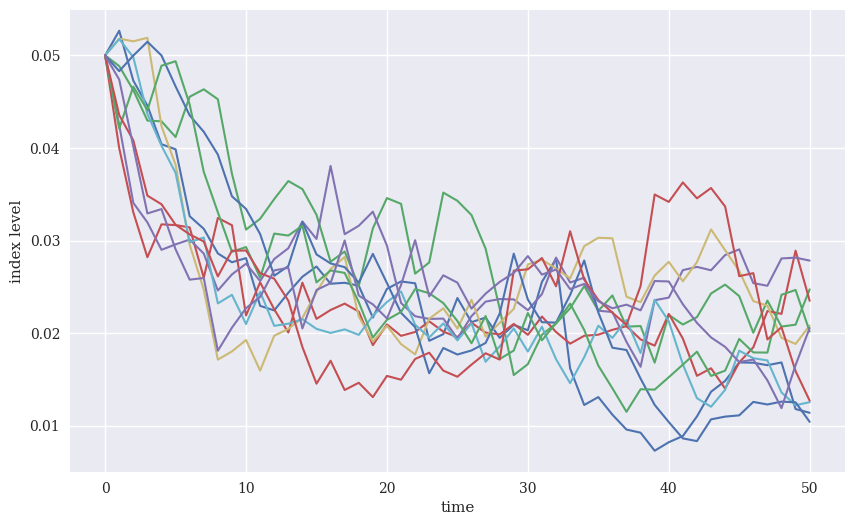

In [44]:
# ---------------------Stochastic volatility----------------------------

# 1. Gi√° tr·ªã trung b√¨nh h·ªìi ph·ª•c (Œ∏)
# Gi√° tr·ªã trung b√¨nh h·ªìi ph·ª•c Œ∏ l√† m·ª©c ƒë·ªô m√† bi·∫øn ƒë·ªông gi√° (volatility) c√≥ xu h∆∞·ªõng quay v·ªÅ theo th·ªùi gian. 
# N√≥ ƒë·∫°i di·ªán cho gi√° tr·ªã ·ªïn ƒë·ªãnh m√† bi·∫øn ƒë·ªông gi√° s·∫Ω h∆∞·ªõng t·ªõi trong d√†i h·∫°n.

# Vai tr√≤: Khi bi·∫øn ƒë·ªông gi√° hi·ªán t·∫°i qu√° cao ho·∫∑c qu√° th·∫•p so v·ªõi Œ∏, m√¥ h√¨nh Heston s·∫Ω ƒë∆∞a bi·∫øn ƒë·ªông gi√° tr·ªü v·ªÅ gi√° tr·ªã Œ∏ theo th·ªùi gian.
# ƒê∆°n gi·∫£n: Œ∏ c√≥ th·ªÉ ƒë∆∞·ª£c hi·ªÉu l√† m·ª©c trung b√¨nh c·ªßa bi·∫øn ƒë·ªông gi√° m√† bi·∫øn ƒë·ªông gi√° s·∫Ω c·ªë g·∫Øng ƒë·∫°t ƒë∆∞·ª£c.
# V√≠ d·ª• c·ª• th·ªÉ:
# Gi·∫£ s·ª≠ gi√° tr·ªã trung b√¨nh h·ªìi ph·ª•c Œ∏ l√† 0.25. ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† trong d√†i h·∫°n, bi·∫øn ƒë·ªông gi√° s·∫Ω c√≥ xu h∆∞·ªõng tr·ªü v·ªÅ gi√° tr·ªã 0.25.
# N·∫øu bi·∫øn ƒë·ªông hi·ªán t·∫°i l√† 0.3, m√¥ h√¨nh s·∫Ω c√≥ xu h∆∞·ªõng gi·∫£m bi·∫øn ƒë·ªông xu·ªëng g·∫ßn 0.25. 
# Ng∆∞·ª£c l·∫°i, n·∫øu bi·∫øn ƒë·ªông hi·ªán t·∫°i l√† 0.2, m√¥ h√¨nh s·∫Ω c√≥ xu h∆∞·ªõng tƒÉng bi·∫øn ƒë·ªông l√™n g·∫ßn 0.25.


# 2. T·ª∑ l·ªá h·ªìi ph·ª•c (Œ∫)
# T·ª∑ l·ªá h·ªìi ph·ª•c Œ∫ l√† m·ªôt tham s·ªë ƒëi·ªÅu ch·ªânh t·ªëc ƒë·ªô m√† bi·∫øn ƒë·ªông gi√° quay tr·ªü v·ªÅ gi√° tr·ªã trung b√¨nh h·ªìi ph·ª•c 
# Œ∏. N√≥ x√°c ƒë·ªãnh m·ª©c ƒë·ªô "s√°t sao" c·ªßa m√¥ h√¨nh v·ªõi gi√° tr·ªã trung b√¨nh h·ªìi ph·ª•c.

# Vai tr√≤: 
    # Œ∫ cho bi·∫øt t·ªëc ƒë·ªô m√† bi·∫øn ƒë·ªông gi√° ƒëi·ªÅu ch·ªânh ƒë·ªÉ tr·ªü v·ªÅ 
    # Œ∏. T·ª∑ l·ªá h·ªìi ph·ª•c cao c√≥ nghƒ©a l√† bi·∫øn ƒë·ªông gi√° s·∫Ω tr·ªü v·ªÅ 
    # Œ∏ nhanh h∆°n.
# ƒê∆°n gi·∫£n: 
    # Œ∫ x√°c ƒë·ªãnh t·ªëc ƒë·ªô ph·∫£n ·ª©ng c·ªßa bi·∫øn ƒë·ªông gi√° ƒë·ªëi v·ªõi s·ª± kh√°c bi·ªát gi·ªØa gi√° tr·ªã hi·ªán t·∫°i v√† gi√° tr·ªã trung b√¨nh h·ªìi ph·ª•c.
    # V√≠ d·ª• c·ª• th·ªÉ:
    # N·∫øu Œ∫ l√† 3.0 v√† Œ∏ l√† 0.25:
    # N·∫øu bi·∫øn ƒë·ªông hi·ªán t·∫°i l√† 0.1, m√¥ h√¨nh s·∫Ω ƒëi·ªÅu ch·ªânh bi·∫øn ƒë·ªông ƒë·ªÉ tƒÉng l√™n g·∫ßn 0.25 v·ªõi t·ªëc ƒë·ªô do Œ∫ x√°c ƒë·ªãnh.
    # N·∫øu Œ∫ l√† cao (v√≠ d·ª•, 10), bi·∫øn ƒë·ªông gi√° s·∫Ω tr·ªü v·ªÅ 0.25 nhanh ch√≥ng.
    # N·∫øu Œ∫ l√† th·∫•p (v√≠ d·ª•, 0.5), bi·∫øn ƒë·ªông gi√° s·∫Ω tr·ªü v·ªÅ 0.25 ch·∫≠m h∆°n.

# Using euler discretization for square-root diffusion
# x0: Gi√° tr·ªã ban ƒë·∫ßu c·ªßa qu√° tr√¨nh khu·∫øch t√°n (0.05).
# kappa: T·ªëc ƒë·ªô tr·ªü v·ªÅ m·ª©c trung b√¨nh (3.0).
# theta: M·ª©c trung b√¨nh d√†i h·∫°n hay gi√° tr·ªã trung b√¨nh h·ªìi ph·ª•c  (0.02).
# sigma: ƒê·ªô bi·∫øn ƒë·ªông (0.1).
# I: S·ªë l∆∞·ª£ng m√¥ ph·ªèng (10000).
# M: S·ªë b∆∞·ªõc th·ªùi gian (50).
# dt: K√≠ch th∆∞·ªõc b∆∞·ªõc th·ªùi gian (dt = T/M).
# So v·ªõi h√¨nh tr√™n, h√¨nh n√†y c√≥ ph√¢n b·ªëi ch·ªß y·∫øu taij 0.2, m·∫∑c d√π c√≥ gi√° tr·ªã kh·ªüi t·∫°o l√† 0.5, ƒëi·ªÅu n√†y c√≥ nghƒ©a l√† 
# c√°c s·ªë kh√¥ng ƒë·ªëi x·ª©ng nhau qua gi√° tr·ªã kh·ªüi t·∫°o nh∆∞ h√¨nh tr√™n, li·ªáu c√≥ ph·∫£i do x1 tu√¢n theo ph√¢n b·ªë chi-square
# v√† √Ω nghƒ©a c·ªßa ph√¢n r√£ eul·∫ªr l√† t·∫°o ra ph√¢n b·ªë chi-square ????

x0 = 0.05 
kappa = 3.0 
theta = 0.02 
sigma = 0.1 
I = 10000
T = 2.0
M = 50
dt = T / M
# S∆∞r d·ª•ng euler ƒë·ªÉ t√≠nh squre-root diff√∫ion
def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] +kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
    sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *
    math.sqrt(dt) * npr.standard_normal(I)) 
    x = np.maximum(xh, 0)
    return x
# S·ª≠ d·ª•ng noncentral_chisquare ƒë·ªÉ t√≠nh ch√≠nh x√°c
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2 
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa) 
        nc = np.exp(-kappa * dt) / c * x[t - 1] 
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I) 
    return x
x2 = srd_exact()

x1 = srd_euler()
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [12]:
# M√¥ h√¨nh Heston l√† m·ªôt m√¥ h√¨nh ph·ªï bi·∫øn trong t√†i ch√≠nh ƒë·ªÉ m√¥ ph·ªèng gi√° c·ªï phi·∫øu v·ªõi bi·∫øn ƒë·ªông ng·∫´u nhi√™n.
#  N√≥ m·ªü r·ªông m√¥ h√¨nh Black-Scholes b·∫±ng c√°ch cho ph√©p ƒë·ªô bi·∫øn ƒë·ªông thay ƒë·ªïi theo th·ªùi gian, thay v√¨ gi·ªØ c·ªë ƒë·ªãnh. 
# ƒêi·ªÅu n√†y gi√∫p m√¥ h√¨nh Heston ph√π h·ª£p h∆°n v·ªõi th·ª±c t·∫ø, v√¨ ƒë·ªô bi·∫øn ƒë·ªông c·ªßa gi√° c·ªï phi·∫øu th∆∞·ªùng kh√¥ng c·ªë ƒë·ªãnh trong su·ªët th·ªùi gian.

# M·ªôt trong nh·ªØng gi·∫£ ƒë·ªãnh ƒë∆°n gi·∫£n h√≥a ch√≠nh c·ªßa m√¥ h√¨nh Black-Scholes-Merton l√† ƒë·ªô bi·∫øn ƒë·ªông kh√¥ng ƒë·ªïi. Tuy nhi√™n, ƒë·ªô bi·∫øn ƒë·ªông n√≥i chung kh√¥ng ph·∫£i l√† h·∫±ng s·ªë c≈©ng kh√¥ng ph·∫£i l√† x√°c ƒë·ªãnh‚Äîm√† l√† ng·∫´u nhi√™n. Do ƒë√≥, m·ªôt ti·∫øn b·ªô l·ªõn li√™n quan ƒë·∫øn m√¥ h√¨nh t√†i ch√≠nh ƒë√£ ƒë·∫°t ƒë∆∞·ª£c v√†o ƒë·∫ßu nh·ªØng nƒÉm 1990 v·ªõi s·ª± ra ƒë·ªùi c·ªßa c√°i g·ªçi l√† m√¥ h√¨nh ƒë·ªô bi·∫øn ƒë·ªông ng·∫´u nhi√™n
# . M·ªôt trong nh·ªØng m√¥ h√¨nh ph·ªï bi·∫øn nh·∫•t thu·ªôc lo·∫°i ƒë√≥ l√† m√¥ h√¨nh c·ªßa Heston
# Ph∆∞∆°ng trinhf vi ph√¢n ng·∫´u nhi√™n cho bi·∫øn ƒë·ªông Heston

# Ph∆∞∆°ng tr√¨nh Heston g·ªìm 2 ph∆∞∆°ng tr√¨nh vi ph√¢n ng·∫´u nhi√™n 
# 1,Ph∆∞∆°ng tr√¨nh cho gi√° c·ªï phi·∫øu St :
#     dSt = u*Stdt + sqrt(vt)*St*dWs
# trong ƒë√≥ :
#     St l√† gi√° t·∫°i th·ªùi ƒëi·ªÉm t
#     u l√† t·ªâ l·ªá tƒÉng tr∆∞·ªüng k·ª≥ v·ªçng
#     vt l√† ƒë·ªô bi·∫øn ƒë·ªông t·∫°i th·ªùi ƒëi·ªÉm t
#     Ws l√† m·ªôt qu√° trinh weiner cho bi·∫øn ƒë·ªông gi√° c√¥ phi·∫øu 
# 2, Ph∆∞∆°ng tr√¨nh cho bi·∫øn ƒë·ªông vt :
#     dvt = k(o - vt)dt + phi*sqrt(vt)dWv
# trong ƒë√≥ :
#     vt l√† bi·∫øn ƒë·ªông t·∫°i th·ªùi ƒëi√™m t
#     k l√† ƒë·ªô ph·ª•c h·ªìi v·ªÅ gi√° trung b√¨nh o
#     o l√† trung b√¨nh c·ªßa bi·∫øn ƒë·ªông
#     phi l√† ƒë·ªô bi·∫øn ƒë·ªông c·ªßa bi·∫øn ƒë·ªông
#     Wv l√† m·ªôt qu√° trinhf weiner cho bi√™ns ƒë·ªông gi√°

# C·∫£ Wv v√† Ws ƒë·ªÅu c√≥ ƒë·ªô t∆∞∆°ng quan l√† p

# Ma tr·∫≠n t∆∞∆°ng quan l√† m·ªôt ma tr·∫≠n vu√¥ng bi·ªÉu di·ªÖn m·ªëi t∆∞∆°ng quan gi·ªØa c√°c c·∫∑p bi·∫øn ng·∫´u nhi√™n. C√°c gi√° tr·ªã trong ma tr·∫≠n 
# t∆∞∆°ng quan n·∫±m trong kho·∫£ng t·ª´ -1 ƒë·∫øn 1, v·ªõi c√°c gi√° tr·ªã c·ª• th·ªÉ nh∆∞ sau:

# Gi√° tr·ªã 1 bi·ªÉu th·ªã m·ªëi t∆∞∆°ng quan d∆∞∆°ng ho√†n h·∫£o.
# Gi√° tr·ªã -1 bi·ªÉu th·ªã m·ªëi t∆∞∆°ng quan √¢m ho√†n h·∫£o.
# Gi√° tr·ªã 0 bi·ªÉu th·ªã kh√¥ng c√≥ m·ªëi t∆∞∆°ng quan.
# Ma tr·∫≠n t∆∞∆°ng quan th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ m√¥ t·∫£ m·ªëi t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn ng·∫´u nhi√™n trong m·ªôt t·∫≠p d·ªØ li·ªáu. 
# Trong b·ªëi c·∫£nh m√¥ h√¨nh Heston, n√≥ m√¥ t·∫£ m·ªëi t∆∞∆°ng quan gi·ªØa gi√° c·ªï phi·∫øu v√† bi·∫øn ƒë·ªông gi√°.

# Kh·ªüi t·∫°o c√°c tham s·ªë c·ªßa m√¥ h√¨nh Heston:

# S0 = 100.0: Gi√° c·ªï phi·∫øu ban ƒë·∫ßu.
# r = 0.05: L√£i su·∫•t phi r·ªßi ro.
# v0 = 0.1: Bi·∫øn ƒë·ªông gi√° c·ªï phi·∫øu ban ƒë·∫ßu.
# kappa = 3.0: T·ªëc ƒë·ªô h·ªìi ph·ª•c c·ªßa bi·∫øn ƒë·ªông gi√° v·ªÅ gi√° tr·ªã trung b√¨nh.
# theta = 0.25: Gi√° tr·ªã trung b√¨nh c·ªßa bi·∫øn ƒë·ªông gi√° khi n√≥ h·ªìi ph·ª•c.
# sigma = 0.1: ƒê·ªô bi·∫øn ƒë·ªông c·ªßa bi·∫øn ƒë·ªông gi√°.
# rho = 0.6: H·ªá s·ªë t∆∞∆°ng quan gi·ªØa gi√° c·ªï phi·∫øu v√† bi·∫øn ƒë·ªông gi√°.
# T = 1.0: Th·ªùi gian ƒë√°o h·∫°n.
# X√¢y d·ª±ng ma tr·∫≠n t∆∞∆°ng quan:

# corr_mat = np.zeros((2, 2)): T·∫°o m·ªôt ma tr·∫≠n 2x2 ch·ª©a to√†n s·ªë 0.
# corr_mat[0, :] = [1.0, rho]: Thi·∫øt l·∫≠p h√†ng ƒë·∫ßu ti√™n c·ªßa ma tr·∫≠n t∆∞∆°ng quan.
# corr_mat[1, :] = [rho, 1.0]: Thi·∫øt l·∫≠p h√†ng th·ª© hai c·ªßa ma tr·∫≠n t∆∞∆°ng quan.
# Ma tr·∫≠n t∆∞∆°ng quan n√†y bi·ªÉu di·ªÖn m·ªëi t∆∞∆°ng quan gi·ªØa gi√° c·ªï phi·∫øu v√† bi·∫øn ƒë·ªông gi√°.

# T√≠nh ma tr·∫≠n Cholesky:

# cho_mat = np.linalg.cholesky(corr_mat): T√≠nh to√°n ma tr·∫≠n Cholesky c·ªßa ma tr·∫≠n t∆∞∆°ng quan.
# Ma tr·∫≠n Cholesky s·∫Ω ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ t·∫°o ra c√°c bi·∫øn ng·∫´u nhi√™n t∆∞∆°ng quan t·ª´ c√°c bi·∫øn ng·∫´u nhi√™n ƒë·ªôc l·∫≠p. ƒêi·ªÅu n√†y h·ªØu √≠ch trong vi·ªác m√¥ ph·ªèng ƒë∆∞·ªùng gi√° c·ªßa c·ªï phi·∫øu v√† bi·∫øn ƒë·ªông gi√° theo th·ªùi gian.

# In ra ma tr·∫≠n Cholesky:

# cho_mat: K·∫øt qu·∫£ c·ªßa ma tr·∫≠n Cholesky ƒë∆∞·ª£c t√≠nh to√°n.
S0 = 100.
r = 0.05
v0 = 0.1 
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6 
T = 1.0
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat) 
cho_mat 

# √ù nghƒ©a c·ªßa ma tr·∫≠n t∆∞∆°ng quan v√† ph√©p ph√¢n t√≠ch ma tr·∫≠n Cholesky :
# 1. Bi·∫øn ng·∫´u nhi√™n ƒë·ªôc l·∫≠p
#  Bi·∫øn ng·∫´u nhi√™n ƒë·ªôc l·∫≠p l√† c√°c bi·∫øn kh√¥ng c√≥ m·ªëi t∆∞∆°ng quan v·ªõi nhau. V√≠ d·ª•, n·∫øu Z1 v√† Z2 l√† hai bi√™n ng·∫´u nhi√™n ƒë·ªôc l·∫≠p
# th√¨ Z1 kh√¥ng lq ƒë·∫øn Z2 
# 2,Ma tr·∫≠n t∆∞∆°ng quan 
# Ma tr·∫≠n t∆∞∆°ng quan bi·ªÉu di·ªÖn m·ªëi t∆∞∆°ng quan gi·ªØa c√°c c·∫∑p bi·∫øn ng·∫´u nhi√™n. N·∫øu ch√∫ng ta c√≥ hai bi·∫øn ng·∫´u nhi√™n W1 v√† W2
#   v·ªõi h·ªá s·ªë t∆∞∆°ng quan ùúå th√¨ ma tr·∫≠n t∆∞∆°ng quan c·ªßa ch√∫ng s·∫Ω l√†:
#     Œ£ = [[1,p]
#              [p,1]]
# 3,Ph√©p ph√¢n t√≠ch Cholesky :
# Ph√©p ph√¢n t√≠ch Cholesky l√† m·ªôt ph∆∞∆°ng ph√°p ph√¢n t√≠ch ma tr·∫≠n, trong ƒë√≥ m·ªôt ma tr·∫≠n ƒë·ªëi x·ª©ng d∆∞∆°ng (nh∆∞ ma tr·∫≠n t∆∞∆°ng quan) ƒë∆∞·ª£c ph√¢n t√≠ch th√†nh 
# t√≠ch c·ªßa m·ªôt ma tr·∫≠n tam gi√°c d∆∞·ªõi v√† ma tr·∫≠n chuy·ªÉn v·ªã c·ªßa n√≥. C·ª• th·ªÉ, cho ma tr·∫≠n t∆∞∆°ng quan 
# Œ£, ph√©p ph√¢n t√≠ch Cholesky t√¨m ma tr·∫≠n tam gi√°c d∆∞·ªõi L sao cho:
#     Œ£ = L*LT 
# Trong ƒë√≥ LT l√† ma tr·∫≠n chuy·ªÉn v·ªã c·ªßa L
# 4. T·∫°o c√°c bi·∫øn ng·∫´u nhi√™n t∆∞∆°ng quan
# Khi ch√∫ng ta c√≥ c√°c bi·∫øn ng·∫´u nhi√™n ƒë·ªôc l·∫≠p, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng ma tr·∫≠n Cholesky ƒë·ªÉ t·∫°o ra c√°c bi·∫øn ng·∫´u nhi√™n c√≥ m·ªëi t∆∞∆°ng quan mong mu·ªën. ƒê√¢y l√† c√°ch l√†m:

# T·∫°o c√°c bi·∫øn ng·∫´u nhi√™n ƒë·ªôc l·∫≠p: Gi·∫£ s·ª≠ Z1 v√† Z2 l√† hai bi·∫øn ng·∫´u nhi√™n ƒë·ªôc l·∫≠p v·ªõi nhau.
# Nh√¢n v·ªõi ma tr·∫≠n Cholesky: S·ª≠ d·ª•ng ma tr·∫≠n tam gi√°c d∆∞·ªõi L t·ª´ ph√©p ph√¢n t√≠ch Cholesky ƒë·ªÉ t·∫°o c√°c bi·∫øn ng·∫´u nhi√™n t∆∞∆°ng quan W1 v√† W2
# : [W1,W2] = L*[Z1,Z2]


array([[1. , 0. ],
       [0.6, 0.8]])

In [29]:
# Tr∆∞·ªõc khi b·∫Øt ƒë·∫ßu m√¥ ph·ªèng c√°c qu√° tr√¨nh ng·∫´u nhi√™n, to√†n b·ªô t·∫≠p h·ª£p c√°c s·ªë ng·∫´u nhi√™n cho c·∫£ hai qu√° tr√¨nh ƒë∆∞·ª£c t·∫°o ra, 
# t√¨m c√°ch s·ª≠ d·ª•ng t·∫≠p 0 cho qu√° tr√¨nh ch·ªâ s·ªë v√† t·∫≠p 1 cho qu√° tr√¨nh bi·∫øn ƒë·ªông. ƒê·ªëi v·ªõi qu√° tr√¨nh bi·∫øn ƒë·ªông ƒë∆∞·ª£c m√¥ h√¨nh h√≥a b·∫±ng khu·∫øch t√°n cƒÉn b·∫≠c hai, 
# l∆∞·ª£c ƒë·ªì Euler ƒë∆∞·ª£c ch·ªçn, c√≥ t√≠nh ƒë·∫øn t∆∞∆°ng quan th√¥ng qua
# Ma tr·∫≠n Cholesky:

M = 50      # S·ªë b∆∞·ªõc th·ªùi gian trong m√¥ ph·ªèng
I = 10000   # S·ªë l∆∞·ª£ng ƒë∆∞·ªùng m√¥ ph·ªèng
dt = T / M  # Kho·∫£ng th·ªùi gian gi·ªØa c√°c b∆∞·ªõc
ran_num = npr.standard_normal((2, M + 1, I)) 
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :]) # Nh√¢n ma tr·∫≠n Cholesky v·ªõi c√°c bi·∫øn ng·∫´u nhi√™n ƒë·ªÉ t·∫°o ra c√°c bi·∫øn ng·∫´u nhi√™n t∆∞∆°ng quan
#     C·∫≠p nh·∫≠t bi·∫øn ƒë·ªông (vh[t]):

# T·∫°i b∆∞·ªõc th·ªùi gian t, bi·∫øn ƒë·ªông m·ªõi vh[t] ƒë∆∞·ª£c t√≠nh b·∫±ng c√°ch c·ªông gi√° tr·ªã bi·∫øn ƒë·ªông t·∫°i b∆∞·ªõc th·ªùi gian tr∆∞·ªõc ƒë√≥ (vh[t - 1]) v·ªõi hai th√†nh ph·∫ßn:
# Th√†nh ph·∫ßn h·ªìi ph·ª•c: 
#   ƒê∆∞a bi·∫øn ƒë·ªông v·ªÅ gi√° tr·ªã trung b√¨nh theta theo t·ª∑ l·ªá h·ªìi ph·ª•c kappa, ƒëi·ªÅu n√†y ƒë∆∞·ª£c th·ª±c hi·ªán b·∫±ng c√°ch nh√¢n hi·ªáu gi·ªØa gi√° tr·ªã trung b√¨nh theta 
# v√† gi√° tr·ªã bi·∫øn ƒë·ªông hi·ªán t·∫°i vh[t - 1], sau ƒë√≥ nh√¢n v·ªõi b∆∞·ªõc th·ªùi gian dt.

# Th√†nh ph·∫ßn ng·∫´u nhi√™n: 
# Cung c·∫•p s·ª± thay ƒë·ªïi ng·∫´u nhi√™n trong bi·∫øn ƒë·ªông, t√≠nh b·∫±ng c√°ch nh√¢n sigma, ƒë·ªô bi·∫øn ƒë·ªông hi·ªán t·∫°i, v√† bi·∫øn ng·∫´u nhi√™n ran[1] v·ªõi ph·∫ßn ƒëi·ªÅu ch·ªânh theo b∆∞·ªõc th·ªùi gian.
# ƒê·∫£m b·∫£o kh√¥ng √¢m (np.maximum(vh[t - 1], 0)):

# H√†m np.maximum ƒë·∫£m b·∫£o r·∫±ng bi·∫øn ƒë·ªông kh√¥ng tr·ªü th√†nh √¢m, v√¨ bi·∫øn ƒë·ªông kh√¥ng th·ªÉ √¢m trong m√¥ h√¨nh Heston.
    vh[t] = (vh[t - 1] +
            kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
            sigma * np.sqrt(np.maximum(vh[t - 1], 0)) *
            math.sqrt(dt) * ran[1]) 
v = np.maximum(vh, 0)
v
# T√≥m l·∫°i, h√†m n√†y ƒë·ªÉ m√¥ ph·ªèng ƒë·ªô bi·∫øn ƒë·ªông gi√° theo m√¥ h√¨nh Heston

array([[0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.11536419, 0.11621647, 0.10059682, ..., 0.11609063, 0.10610937,
        0.11209343],
       [0.11937027, 0.12661236, 0.10920802, ..., 0.12887457, 0.11511914,
        0.13022926],
       ...,
       [0.22826429, 0.19755358, 0.22708456, ..., 0.24466646, 0.23275404,
        0.25658243],
       [0.22608365, 0.20846394, 0.22748196, ..., 0.25251171, 0.23393714,
        0.24271056],
       [0.22639581, 0.21582082, 0.23487587, ..., 0.25813792, 0.24218818,
        0.23869098]])

In [30]:
# ƒêo·∫°n m√£ m√¥ ph·ªèng gi√° c·ªï phi·∫øu theo m√¥ h√¨nh Heston.
# N√≥ s·ª≠ d·ª•ng gi√° c·ªï phi·∫øu v√† bi·∫øn ƒë·ªông gi√° t·∫°i b∆∞·ªõc th·ªùi gian tr∆∞·ªõc ƒë√≥ ƒë·ªÉ t√≠nh to√°n gi√° c·ªï phi·∫øu t·∫°i b∆∞·ªõc th·ªùi gian hi·ªán t·∫°i.
# C√¥ng th·ª©c t√≠nh to√°n gi√° c·ªï phi·∫øu bao g·ªìm m·ªôt ph·∫ßn kh√¥ng ng·∫´u nhi√™n v√† m·ªôt ph·∫ßn ng·∫´u nhi√™n, v·ªõi ph·∫ßn ng·∫´u nhi√™n d·ª±a tr√™n ƒë·ªô bi·∫øn ƒë·ªông c·ªßa gi√° c·ªï phi·∫øu.
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
            np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

Text(0.5, 0, 'volatility')

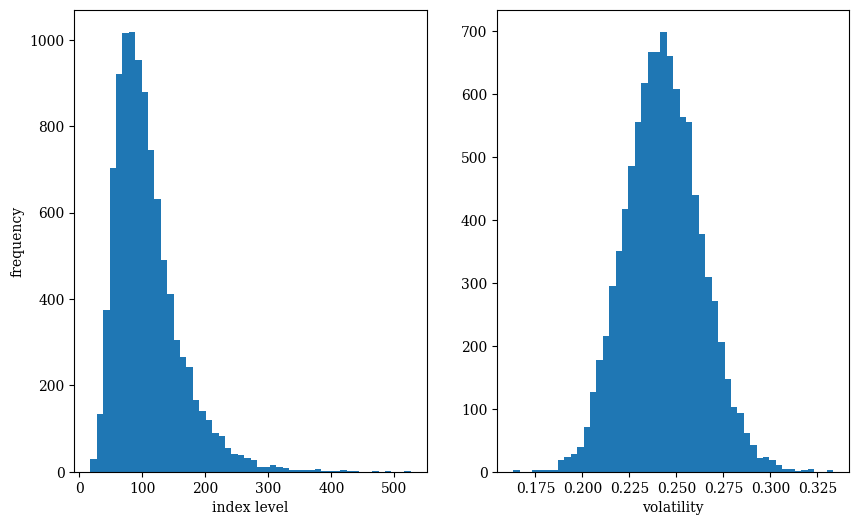

In [31]:
# M√¥ h√¨nh gi√° v√† ƒë·ªô bi·∫øn ƒë·ªông
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')

Text(0, 0.5, 'volatility')

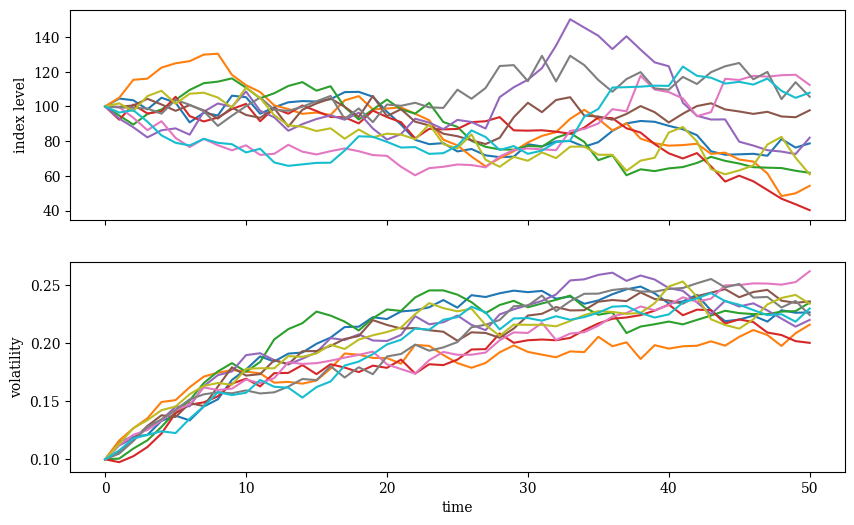

In [32]:
# M√¥ ph·ªèng s·ª± bi·∫øn ƒë·ªông :
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')

Text(0, 0.5, 'frequency')

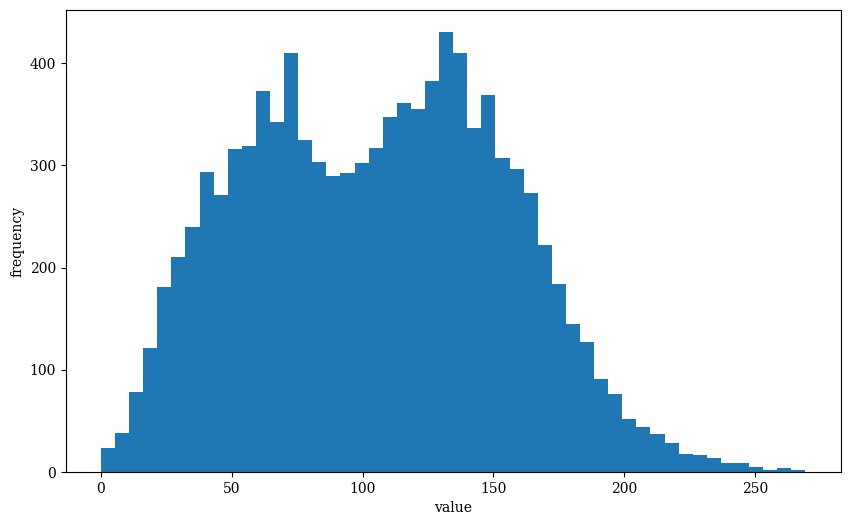

In [6]:
# --------------------Jump diffusion---------------
# M√¥ h√¨nh Jump Diffusion c·ªßa Merton l√† m·ªôt m√¥ h√¨nh t√†i ch√≠nh m·ªü r·ªông m√¥ h√¨nh Brownian Motion ƒë·ªÉ bao g·ªìm c·∫£ nh·∫£y (jumps) trong qu√° tr√¨nh gi√°.
# M√¥ h√¨nh n√†y k·∫øt h·ª£p c√°c y·∫øu t·ªë c·ªßa m√¥ h√¨nh bi·∫øn ƒë·ªông li√™n t·ª•c v·ªõi c√°c nh·∫£y b·∫•t ng·ªù ƒë·ªÉ m√¥ ph·ªèng s·ª± thay ƒë·ªïi gi√° c·ªï phi·∫øu m·ªôt c√°ch th·ª±c t·∫ø h∆°n.

# C√°c th√†nh ph·∫ßn ch√≠nh c·ªßa m√¥ h√¨nh Merton Jump Diffusion
# 1,Chuy·ªÉn ƒë·ªông Brownian (Diffusion Process):
#     -M√¥ h√¨nh Merton d·ª±a tr√™n m√¥ h√¨nh bi·∫øn ƒë·ªông li√™n t·ª•c (Brownian motion) c·ªßa c·ªï phi·∫øu.
#     -Gi√° c·ªï phi·∫øu St ƒë∆∞·ª£c m√¥ ph·ªèng b·∫±ng c√°ch s·ª≠ d·ª•ng ph∆∞∆°ng tr√¨nh sau:
#         dSt = u*St*dt + phi*St*dWt
#     Trong ƒë√≥ :
#     -u l√† l√£i su·∫•t k√¨ v·ªçng 
#     -phi l√† ƒë·ªô bi·∫øn ƒë·ªông c·ªßa c·ªï phi·∫øu
#     -dWt l√† ph·∫ßn ng·∫´u nhi√™n c·ªßa bi·∫øn ƒë·ªông,theo ph√¢n ph·ªëi chu·∫©n

# 2,Nh·∫£y (Jump Process):
#     M√¥ h√¨nh Merton b·ªï sung m·ªôt ph·∫ßn nh·∫£y (jump) ƒë·ªÉ m√¥ ph·ªèng c√°c s·ª± ki·ªán b·∫•t ng·ªù (nh∆∞ tin t·ª©c hay th√¥ng tin quan tr·ªçng) m√† c√≥ th·ªÉ ·∫£nh h∆∞·ªüng ƒë·∫øn gi√° c·ªï phi·∫øu.
#     C√°c nh·∫£y n√†y ƒë∆∞·ª£c m√¥ ph·ªèng b·∫±ng c√°ch s·ª≠ d·ª•ng m·ªôt qu√° tr√¨nh Poisson, v·ªõi ph·∫ßn nh·∫£y c√≥ ph√¢n ph·ªëi lognormal.
#     Ph∆∞∆°ng tr√¨nh c·ªßa qu√° tr√¨nh nh·∫£y ƒë∆∞·ª£c cho b·ªüi:
#         dSt = St*(u*dt+phi*dWt + JdNt)
#     Trong ƒë√≥:
#     J l√† k√≠ch th∆∞·ªõc c·ªßa nh·∫£y, theo ph√¢n ph·ªëi lognormal.
#     Nt l√† qu√° tr√¨nh Poisson, m√¥ ph·ªèng s·ªë l·∫ßn nh·∫£y x·∫£y ra trong kho·∫£ng th·ªùi gian dt.


# C√°ch ho·∫°t ƒë·ªông c·ªßa m√¥ h√¨nh
    # Chuy·ªÉn ƒë·ªông Brownian (Diffusion Component):
        # M√¥ h√¨nh n√†y m√¥ ph·ªèng bi·∫øn ƒë·ªông gi√° c·ªï phi·∫øu li√™n t·ª•c nh∆∞ trong m√¥ h√¨nh Black-Scholes, v·ªõi ƒë·ªô bi·∫øn ƒë·ªông v√† l√£i su·∫•t kh√¥ng r·ªßi ro.
    # Nh·∫£y (Jump Component):
        # Th√™m v√†o ph·∫ßn nh·∫£y ƒë·ªÉ m√¥ ph·ªèng c√°c s·ª± ki·ªán b·∫•t ng·ªù. S·ªë l∆∞·ª£ng nh·∫£y trong m·ªôt kho·∫£ng th·ªùi gian tu√¢n theo ph√¢n ph·ªëi Poisson.
        # K√≠ch th∆∞·ªõc c·ªßa c√°c nh·∫£y tu√¢n theo ph√¢n ph·ªëi lognormal.

S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75 
mu = -0.6 
delta = 0.25 
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1) 
T = 1.0
M = 50
I = 10000
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I)) 
sn2 = npr.standard_normal((M + 1, I)) 
poi = npr.poisson(lamb * dt, (M + 1, I)) 
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +
                        sigma * math.sqrt(dt) * sn1[t]) +
                        (np.exp(mu + delta * sn2[t]) - 1) *
                        poi[t]) 
    S[t] = np.maximum(S[t], 0)
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

In [7]:
# ---------------Gi·∫£m ph∆∞∆°ng sai--------------
# C√°c h√†m t·∫°o s·ªë ng·∫´u nhi√™n c·ªßa Python t·∫°o ra c√°c s·ªë ng·∫´u nhi√™n gi·∫£, v√† do k√≠ch th∆∞·ªõc m·∫´u c√≥ th·ªÉ thay ƒë·ªïi,
#  c√°c th·ªëng k√™ c·ªßa c√°c b·ªô s·ªë ng·∫´u nhi√™n n√†y c√≥ th·ªÉ kh√¥ng kh·ªõp v·ªõi c√°c gi√° tr·ªã k·ª≥ v·ªçng. ƒê·ªÉ ki·ªÉm tra ƒëi·ªÅu n√†y,
#  ta c·∫ßn t·∫°o ra c√°c b·ªô s·ªë ng·∫´u nhi√™n v√† ki·ªÉm tra xem gi√° tr·ªã trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n c·ªßa ch√∫ng c√≥ kh·ªõp v·ªõi k·ª≥ v·ªçng hay kh√¥ng.
#  ƒê·ªÉ l√†m cho vi·ªác ki·ªÉm tra n√†y c√≥ √Ω nghƒ©a, gi√° tr·ªã seed c·ªßa b·ªô t·∫°o s·ªë ng·∫´u nhi√™n ƒë∆∞·ª£c c·ªë ƒë·ªãnh, gi√∫p ƒë·∫£m b·∫£o k·∫øt qu·∫£ c√≥ th·ªÉ t√°i l·∫≠p.
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)
    print('%15.12f %15.12f' % (sn.mean(), sn.std()))



           Mean  Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


In [8]:
# M·∫∑c d√π tƒÉng k√≠ch th∆∞·ªõc m·∫´u c√≥ th·ªÉ c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c c·ªßa c√°c th·ªëng k√™ c·ªßa s·ªë ng·∫´u nhi√™n, nh∆∞ng c√°c th·ªëng k√™ v·∫´n 
# kh√¥ng ho√†n to√†n kh·ªõp v·ªõi gi√° tr·ªã mong mu·ªën. ƒê·ªÉ kh·∫Øc ph·ª•c ƒëi·ªÅu n√†y, ta c√≥ th·ªÉ s·ª≠ d·ª•ng k·ªπ thu·∫≠t antithetic variates, 
# trong ƒë√≥ r√∫t ra m·ªôt n·ª≠a s·ªë l∆∞·ª£ng m·∫´u ng·∫´u nhi√™n mong mu·ªën v√† sau ƒë√≥ th√™m v√†o c√°c s·ªë ng·∫´u nhi√™n v·ªõi d·∫•u ng∆∞·ª£c l·∫°i. 
# K·ªπ thu·∫≠t n√†y ƒë·∫£m b·∫£o r·∫±ng gi√° tr·ªã trung b√¨nh c·ªßa t·∫≠p h·ª£p s·ªë ng·∫´u nhi√™n l√† 0. 
# Trong Python, k·ªπ thu·∫≠t n√†y c√≥ th·ªÉ d·ªÖ d√†ng tri·ªÉn khai b·∫±ng c√°ch s·ª≠ d·ª•ng NumPy v√† h√†m np.concatenate()
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))




           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
-0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [9]:
# Moment Matching :
# Ph∆∞∆°ng ph√°p: ƒêi·ªÅu ch·ªânh t·∫≠p d·ªØ li·ªáu sao cho gi√° tr·ªã trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n kh·ªõp v·ªõi gi√° tr·ªã mong mu·ªën. 
# ƒêi·ªÅu n√†y th∆∞·ªùng ƒë∆∞·ª£c th·ª±c hi·ªán b·∫±ng c√°ch thay ƒë·ªïi c√°c s·ªë ng·∫´u nhi√™n ƒë·ªÉ ph√π h·ª£p v·ªõi ph√¢n ph·ªëi chu·∫©n.

sn = npr.standard_normal(10000)
sn.mean()
sn.std()
sn_new = (sn - sn.mean()) / sn.std() 
sn_new.mean()
sn_new.std()

# Antithetic Variates ch·ªâ ƒëi·ªÅu ch·ªânh moment ƒë·∫ßu ti√™n (gi√° tr·ªã trung b√¨nh) nh∆∞ng kh√¥ng ƒëi·ªÅu ch·ªânh moment th·ª© hai (ƒë·ªô l·ªách chu·∫©n).
# Moment Matching l√† k·ªπ thu·∫≠t gi√∫p ƒëi·ªÅu ch·ªânh c·∫£ moment ƒë·∫ßu ti√™n v√† th·ª© hai, ƒë·∫£m b·∫£o c·∫£ gi√° tr·ªã trung b√¨nh v√† ƒë·ªô l·ªách chu·∫©n kh·ªõp v·ªõi gi√° tr·ªã mong mu·ªën.
# K·ªπ thu·∫≠t n√†y c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c c·ªßa c√°c th·ªëng k√™ c·ªßa t·∫≠p d·ªØ li·ªáu ng·∫´u nhi√™n, gi√∫p ch√∫ng kh·ªõp h∆°n v·ªõi c√°c gi√° tr·ªã k·ª≥ v·ªçng c·ªßa ph√¢n ph·ªëi chu·∫©n chu·∫©n h√≥a.

np.float64(0.9999999999999999)